In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Automobile_data.csv")

In [3]:
pd.set_option("max_columns",40)

In [4]:
df.head()

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


In [5]:
df.tail()

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
56,81,volkswagen,sedan,97.3,171.7,ohc,four,85,27,7975.0
57,82,volkswagen,sedan,97.3,171.7,ohc,four,52,37,7995.0
58,86,volkswagen,sedan,97.3,171.7,ohc,four,100,26,9995.0
59,87,volvo,sedan,104.3,188.8,ohc,four,114,23,12940.0
60,88,volvo,wagon,104.3,188.8,ohc,four,114,23,13415.0


In [6]:
df.describe()

,index,wheel-base,length,horsepower,average-mileage,price
count,61.000000,61.000000,61.000000,61.000000,61.000000,58.000000
mean,40.885246,98.481967,173.098361,107.852459,25.803279,15387.000000
std,25.429706,6.679234,14.021846,53.524398,8.129821,11320.259841
min,0.000000,88.400000,141.100000,48.000000,13.000000,5151.000000
25%,18.000000,94.500000,159.100000,68.000000,19.000000,6808.500000
50%,39.000000,96.300000,171.200000,100.000000,25.000000,11095.000000
75%,61.000000,101.200000,177.300000,123.000000,31.000000,18120.500000
max,88.000000,120.900000,208.100000,288.000000,47.000000,45400.000000


In [7]:
df.describe(include="object")

,company,body-style,engine-type,num-of-cylinders
count,61,61,61,61
unique,16,5,7,7
top,toyota,sedan,ohc,four
freq,7,32,46,39


In [8]:
df.isnull().sum()

index               0
company             0
body-style          0
wheel-base          0
length              0
engine-type         0
num-of-cylinders    0
horsepower          0
average-mileage     0
price               3
dtype: int64

In [9]:
nul=df["price"].isnull()==True

In [10]:
df.loc[nul]

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
22,31,isuzu,sedan,94.5,155.9,ohc,four,70,38,NaN
23,32,isuzu,sedan,94.5,155.9,ohc,four,70,38,NaN
47,63,porsche,hatchback,98.4,175.7,dohcv,eight,288,17,NaN


Here are three NaN values in Price , but we don't remove it and don't replace it with none(like mean , median or mode),
because there are only 57 total values and all are unique 


In [11]:
df["price"].nunique()

57

In [12]:
df.loc[df["company"]=="isuzu"]

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
21,30,isuzu,sedan,94.3,170.7,ohc,four,78,24,6785.0
22,31,isuzu,sedan,94.5,155.9,ohc,four,70,38,NaN
23,32,isuzu,sedan,94.5,155.9,ohc,four,70,38,NaN


In [13]:
df.loc[df["company"]=="porsche"]

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
45,61,porsche,hardtop,89.5,168.9,ohcf,six,207,17,34028.0
46,62,porsche,convertible,89.5,168.9,ohcf,six,207,17,37028.0
47,63,porsche,hatchback,98.4,175.7,dohcv,eight,288,17,NaN


In [14]:
df["price"].dtype

dtype('float64')

In [16]:
df.loc[df["company"]=="toyota"]

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
48,66,toyota,hatchback,95.7,158.7,ohc,four,62,35,5348.0
49,67,toyota,hatchback,95.7,158.7,ohc,four,62,31,6338.0
50,68,toyota,hatchback,95.7,158.7,ohc,four,62,31,6488.0
51,69,toyota,wagon,95.7,169.7,ohc,four,62,31,6918.0
52,70,toyota,wagon,95.7,169.7,ohc,four,62,27,7898.0
53,71,toyota,wagon,95.7,169.7,ohc,four,62,27,8778.0
54,79,toyota,wagon,104.5,187.8,dohc,six,156,19,15750.0


In [17]:
df.company.value_counts()

toyota           7
bmw              6
nissan           5
mazda            5
mitsubishi       4
volkswagen       4
mercedes-benz    4
audi             4
porsche          3
chevrolet        3
isuzu            3
jaguar           3
alfa-romero      3
honda            3
dodge            2
volvo            2
Name: company, dtype: int64

In [18]:
df.groupby("company")["price"].max().sort_values(ascending=False)

company
mercedes-benz    45400.0
bmw              41315.0
porsche          37028.0
jaguar           36000.0
audi             18920.0
mazda            18344.0
alfa-romero      16500.0
toyota           15750.0
nissan           13499.0
volvo            13415.0
honda            12945.0
volkswagen        9995.0
mitsubishi        8189.0
isuzu             6785.0
chevrolet         6575.0
dodge             6377.0
Name: price, dtype: float64

In [19]:
df.groupby("company")["average-mileage"].mean().sort_values(ascending=False)

company
chevrolet        41.000000
isuzu            33.333333
volkswagen       31.750000
nissan           31.400000
dodge            31.000000
mitsubishi       29.500000
toyota           28.714286
mazda            28.000000
honda            26.333333
volvo            23.000000
alfa-romero      20.333333
audi             20.000000
bmw              19.000000
mercedes-benz    18.000000
porsche          17.000000
jaguar           14.333333
Name: average-mileage, dtype: float64

In [20]:
df.sort_values("price",ascending=False)

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
35,47,mercedes-benz,hardtop,112.0,199.2,ohcv,eight,184,14,45400.0
11,14,bmw,sedan,103.5,193.8,ohc,six,182,16,41315.0
34,46,mercedes-benz,sedan,120.9,208.1,ohcv,eight,184,14,40960.0
46,62,porsche,convertible,89.5,168.9,ohcf,six,207,17,37028.0
12,15,bmw,sedan,110.0,197.0,ohc,six,182,15,36880.0
...,...,...,...,...,...,...,...,...,...,...
27,36,mazda,hatchback,93.1,159.1,ohc,four,68,30,5195.0
13,16,chevrolet,hatchback,88.4,141.1,l,three,48,47,5151.0
22,31,isuzu,sedan,94.5,155.9,ohc,four,70,38,NaN
23,32,isuzu,sedan,94.5,155.9,ohc,four,70,38,NaN


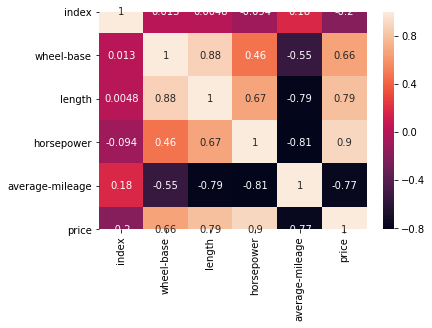

In [21]:
sns.heatmap(df.corr(),annot=True)

No handles with labels found to put in legend.


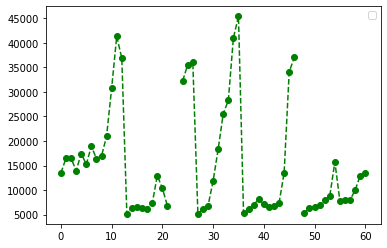

In [22]:
plt.plot(df["price"],"ro--",c="green")
plt.legend()

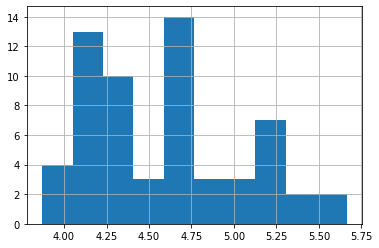

In [23]:
np.log(df["horsepower"]).hist()

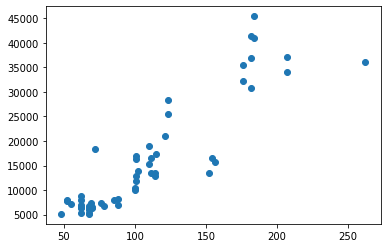

In [24]:
plt.scatter(df["horsepower"],df["price"])
plt.subplot()

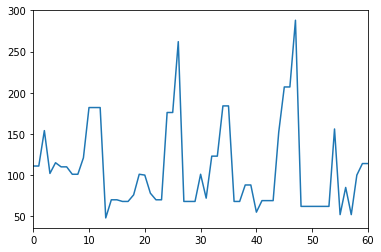

In [25]:
df["horsepower"].plot()

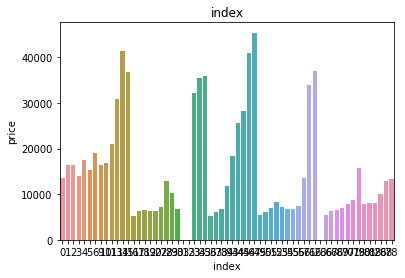

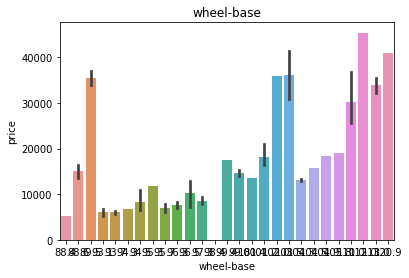

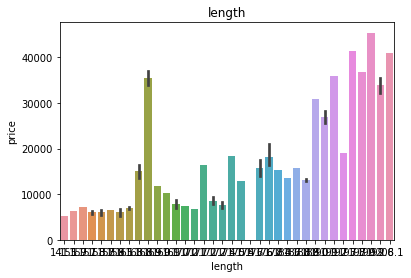

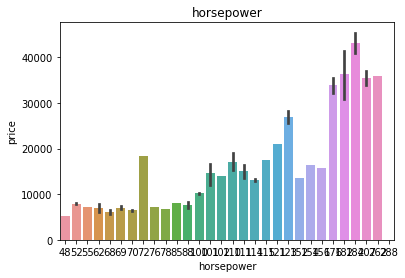

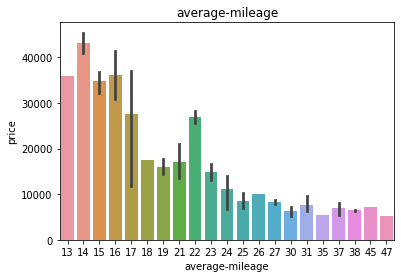

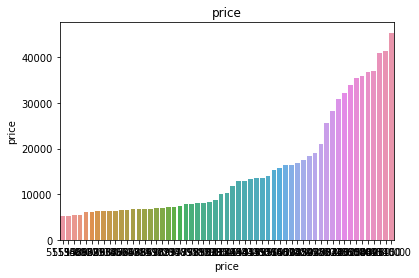

In [30]:
for j in df:
    if df[j].dtype!="O":
        sns.barplot(df[j],df["price"])
        plt.title(j)
        plt.show()
        


After visualize from Heatmap and from Bar plot , we can easily check that Horse-Power is Increasing and Mileage is Decreasing 
while the values of Price are increasing 

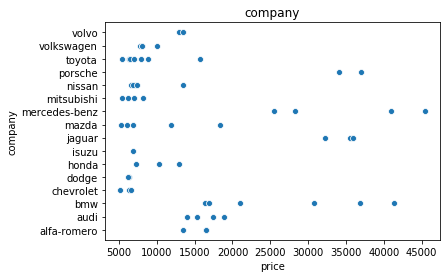

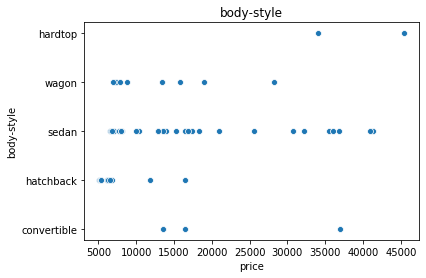

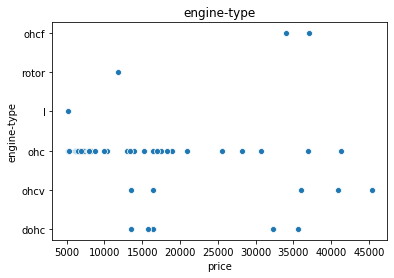

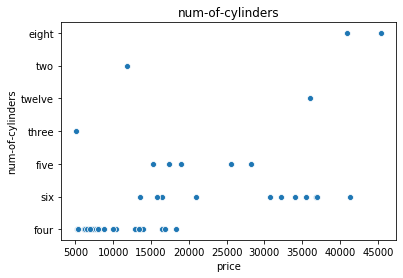

In [27]:
for col in df.columns:
    if df[col].dtype=="O":
        sns.scatterplot(df["price"],df[col])
        plt.title(col)
        plt.show()

,,index,wheel-base,length,horsepower,average-mileage
price,company,,,,,
5151.0,chevrolet,16.0,88.40,141.1,48.0,47.0
5195.0,mazda,36.0,93.10,159.1,68.0,30.0
5348.0,toyota,66.0,95.70,158.7,62.0,35.0
5389.0,mitsubishi,49.0,93.70,157.3,68.0,37.0
6095.0,mazda,37.0,93.10,159.1,68.0,31.0
6189.0,mitsubishi,50.0,93.70,157.3,68.0,31.0
6229.0,dodge,20.0,93.70,157.3,68.0,31.0
6295.0,chevrolet,17.0,94.50,155.9,70.0,38.0
6338.0,toyota,67.0,95.70,158.7,62.0,31.0


In [48]:
df.loc[df["price"]==df["price"].max()]

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
35,47,mercedes-benz,hardtop,112.0,199.2,ohcv,eight,184,14,45400.0


### At last we can only say that mercedes-benz has high value of price because it's  horse-Power is almost high and Mileage is almost low and both factors are already visualize above as well.